# Data collection

In [ ]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2


2025-04-13 10:50:40.744 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: /Users/tyrelglass/PhD/Repositories/robot-vlp


In [21]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EFA260>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EF9960>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EF9E40>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EFA320>}


In [59]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.46225896, -0.8858366 ,  0.04012636,  0.00619764], [ 0.00166411, -0.04611783, -0.9989346 , -0.79024637], [ 0.8867434 , -0.46169972,  0.02279251, -0.6765637 ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.4620658 , -0.8859375 ,  0.04012403,  0.0062117 ], [ 0.0015    , -0.0460242 , -0.9989392 , -0.79022735], [ 0.8868444 , -0.46151543,  0.02259511, -0.67657477]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.46197736, -0.8859842 ,  0.04011114,  0.00625453], [ 0.00161426, -0.04606657, -0.9989371 , -0.79027617], [ 0.88689023, -0.46142158,  0.02271192, -0.6765979 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [29]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [30]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [31]:
last_vive_point = c.get_last_vive_position(log_file)
transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
vive_x, vive_y, vive_z , vive_pitch, vive_yaw, vive_roll = c.extract_pose_y_up(transformed_point)

vive_x, vive_y

(np.float64(0.8818928292362993), np.float64(-0.008833708906460735))

In [32]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: SETUP COMPLETE



'SETUP COMPLETE\r\n'

In [ ]:

nano_response = c.send_command_to_nano('TURN:-500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.



In [61]:
nano_response = c.send_command_to_nano('FORWARD:600')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 300 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [36]:
nano_response = c.send_command_to_nano('MOVE:3000')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 3000 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [35]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[1858,
  1855,
  1843,
  1850,
  1856,
  1853,
  1867,
  1834,
  1856,
  1850,
  1852,
  1854,
  1840,
  1844,
  1848,
  1842,
  1823,
  1852,
  1846,
  1826,
  1840,
  1841,
  1844,
  1838,
  1835,
  1823,
  1830,
  1841,
  1844,
  1823,
  1825,
  1844,
  1838,
  1831,
  1846,
  1841,
  1832,
  1841,
  1838,
  1829,
  1841,
  1842,
  1816,
  1841,
  1854,
  1846,
  1834,
  1832,
  1843,
  1851,
  1837,
  1823,
  1798,
  1893,
  1922,
  1903,
  1912,
  1894,
  1883,
  1889,
  1860,
  1873,
  1860,
  1864,
  1825,
  1848,
  1864,
  1835,
  1847,
  1834,
  1838,
  1842,
  1815,
  1832,
  1832,
  1828,
  1847,
  1826,
  1828,
  1825,
  1831,
  1830,
  1823,
  1830,
  1814,
  1824,
  1835,
  1835,
  1847,
  1838,
  1835,
  1838,
  1835,
  1838,
  1836,
  1842,
  1843,
  1833,
  1836,
  1846,
  1846,
  1832,
  1840,
  1846,
  1831,
  1841,
  1842,
  1831,
  1836,
  1841,
  1827,
  1834,
  1839,
  1841,
  1842,
  1853,
  1832,
  1840,
  1847,
  1847,
  1830,
  1846,
  1856,
  1844,
  1847,


### Vive based data collection

In [ ]:
enc_per_degree = 11.34 /2
enc_per_cm = 89.08 /2


def calc_dist_to_target():
    return np.sqrt(np.square(target_x - x_hist[-1]) + np.square(target_y - y_hist[-1]))

def calc_ang_adjustment():
    x_d = target_x - x_hist[-1]
    y_d = target_y - y_hist[-1]
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - heading_hist[-1]
    return c.normalize_angle(ang_corr)

def update_heading(ang_corr):
    encoder_corr = int(ang_corr * enc_per_degree)
    cmd = 'TURN:' + str(-int(encoder_corr))    # Have reversed the direction of turn!!!!!
    # print('sending message to robot: ', cmd)
    # print('angle of :', ang_corr)
    c.process_move_wifi(cmd, log_file, vive, transformer= None,vlp_read = False)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def step(distance_m):
    encoder_counts = distance_m * enc_per_cm *100
    cmd = 'MOVE:'+str(encoder_counts)
  
    c.process_move_wifi(cmd, log_file, vive, transformer = None,vlp_read = True)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def nav_to_point():

    while (True) :
        heading_corr = calc_ang_adjustment()
        if abs(heading_corr) > 5:
            update_heading(heading_corr)

        dist_to_target = calc_dist_to_target()
        step(0.1)

        if dist_to_target < 0.06:
            break    

def calculate_heading():
    x_d =  x_hist[-1] - x_hist[-2]
    y_d =  y_hist[-1] - y_hist[-2],
    new_heading = np.arctan2(x_d, y_d)[0]*180/np.pi
    return new_heading

def get_robot_location():
    last_vive_point = c.get_last_vive_position(log_file)
    transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    robot_x = vive_x + 0.07*np.sin(vive_yaw/180*np.pi)
    robot_z = vive_z + 0.07*np.cos(vive_yaw/180*np.pi)

    return robot_x, robot_z, c.normalize_angle(vive_yaw + 180)

def print_location():
    print('x = ', x_hist[-1], ' y = ',y_hist[-1], ' heading = ',heading_hist[-1])

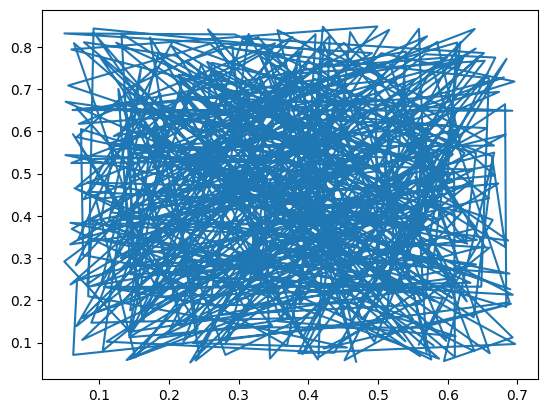

In [ ]:
# np.random.seed(42)  # exp3
# np.random.seed(43)  # exp4
# np.random.seed(44)  # exp5
# np.random.seed(45)  # exp6
# np.random.seed(46)  # exp7

def generate_random_points(num_points, x_range, y_range, min_distance):
    """
    Generates random points within specified x and y ranges,
    ensuring a minimum distance between consecutive points.
    
    Args:
        num_points (int): Number of points to generate.
        x_range (tuple): Tuple specifying the (lower, upper) limits for the x-coordinate.
        y_range (tuple): Tuple specifying the (lower, upper) limits for the y-coordinate.
        min_distance (float): Minimum distance between consecutive points.
    
    Returns:
        np.ndarray: Array of generated points with shape (num_points, 2).
    """
    x_lower, x_upper = x_range
    y_lower, y_upper = y_range

    # Initialize an empty list for the target points
    all_targets = []

    # Generate the first random point within the specified ranges
    x = np.random.uniform(x_lower, x_upper)
    y = np.random.uniform(y_lower, y_upper)
    all_targets.append([x, y])

    # Generate the remaining points
    while len(all_targets) < num_points:
        x = np.random.uniform(x_lower, x_upper)
        y = np.random.uniform(y_lower, y_upper)
        # Check the distance to the last point
        last_x, last_y = all_targets[-1]
        distance = np.sqrt((x - last_x)**2 + (y - last_y)**2)
        if distance >= min_distance:
            all_targets.append([x, y])

    # Convert to a numpy array
    return np.array(all_targets)

# Example usage
x_range = (0.05, 0.7)  # Lower and upper limits for x
y_range = (0.05, 0.85)   # Lower and upper limits for y
num_points = 500
min_distance = 0.1
np.random.seed(1)  # exp1_1
all_targets = generate_random_points(num_points, x_range, y_range, min_distance)

plt.plot(all_targets[:,0], all_targets[:,1])

In [30]:
x_hist = [0.1]
y_hist = [0.05]
heading_hist = [0]



moving to target:  0  at:  [0.3210643  0.62625959]
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -110 encoder counts...

Turning -110 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

x =  0.002608530426160792  y =  0.010330279690645941  heading =  18.634600437461273
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.03366605766786529  y =  0.10355653171451437  heading =  19.195848684834033
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.06315816949972614  y =  0.1983178885970736  heading =  18.945348747444257
C

c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AttributeError: 'float' object has no attribute 'dtype'

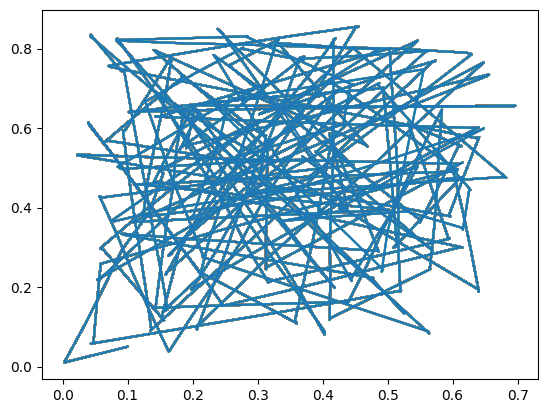

In [31]:
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    target_x= target[0]
    target_y = target[1]
    nav_to_point()
    plt.plot(x_hist, y_hist)


# Live model navigation

In [1]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2

2025-05-03 20:47:29.647 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: S:\robot_vlp\robot-vlp


In [2]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x000001F30FC9E3B0>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x000001F30FC9D720>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x000001F30FC9E410>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x000001F30FC9F010>}


In [3]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.52722925,  0.8496796 ,  0.00857614, -0.21919817], [ 0.01527727,  0.01956998, -0.99969167, -0.78295517], [-0.84958553, -0.5269358 , -0.02329849, -0.26454672]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.52721703,  0.8496857 ,  0.00872068, -0.21908283], [ 0.01490673,  0.01950983, -0.9996984 , -0.7829293 ], [-0.8495997 , -0.5269282 , -0.02295179, -0.26453575]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.527307  ,  0.849626  ,  0.00909559, -0.21921507], [ 0.01468431,  0.01981584, -0.9996957 , -0.7830381 ], [-0.84954774, -0.5270131 , -0.02292505, -0.2643031 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [11]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [12]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [7]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.



'Unknown command.\r\n'

In [25]:
nano_response = c.send_command_to_nano('TURN:500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Turning 500 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done



In [39]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[354,
  3664,
  1001,
  0,
  4095,
  2316,
  1222,
  2411,
  2959,
  394,
  2238,
  1471,
  1709,
  585,
  2686,
  1659,
  645,
  3055,
  1428,
  2382,
  298,
  2837,
  969,
  1242,
  1951,
  3953,
  0,
  1712,
  3358,
  415,
  1398,
  2135,
  1603,
  0,
  4095,
  1212,
  1682,
  2515,
  2666,
  959,
  997,
  2697,
  1137,
  1858,
  1984,
  3964,
  549,
  3198,
  2068,
  2358,
  67,
  3612,
  1085,
  0,
  4095,
  2377,
  1181,
  2611,
  3049,
  347,
  2282,
  1386,
  1710,
  571,
  3253,
  1811,
  655,
  3003,
  1428,
  2389,
  357,
  2817,
  999,
  1233,
  1971,
  3969,
  0,
  1614,
  3067,
  381,
  1457,
  2148,
  1637,
  0,
  4095,
  1377,
  1596,
  2634,
  2690,
  952,
  1071,
  2720,
  1083,
  1875,
  2007,
  3993,
  577,
  3167,
  2071,
  2374,
  0,
  3594,
  1145,
  0,
  4095,
  2451,
  1179,
  2584,
  3154,
  360,
  2354,
  1525,
  1744,
  569,
  3196,
  2039,
  634,
  2965,
  1442,
  2362,
  107,
  2805,
  1017,
  1247,
  1949,
  3985,
  0,
  2624,
  3207,
  374,
  1518,
  21

In [40]:
import numpy as np

def gen_lawnmower_pattern(x_min, x_max, y_min, y_max, line_spacing, start_at='lower_left'):
    """
    Generate a lawn-mower (boustrophedon) path covering the rectangle
    [x_min, x_max] × [y_min, y_max].

    Parameters
    ----------
    x_min, x_max : float
        Horizontal bounds of the sweep.
    y_min, y_max : float
        Vertical bounds of the sweep.
    line_spacing : float
        Distance between adjacent parallel sweep lines (in same units as coords).
    start_at : {'lower_left','upper_left'}, default='lower_left'
        Which corner to start the first pass from.

    Returns
    -------
    waypoints : ndarray, shape (N,2)
        Sequence of (x,y) waypoints you can feed to your tracker.
    """
    # how many passes (plus maybe a partial last one)
    num_passes = int(np.ceil((y_max - y_min) / line_spacing)) + 1

    # build the list of y‐levels
    ys = np.linspace(y_min, y_min + line_spacing*(num_passes-1), num_passes)
    # clamp any that would exceed y_max
    ys = np.clip(ys, y_min, y_max)

    waypoints = []
    for i, y in enumerate(ys):
        # even rows go left→right, odd rows right→left
        if ((i % 2 == 0 and start_at == 'lower_left') or
            (i % 2 == 1 and start_at == 'upper_left')):
            waypoints.append([x_min, y])
            waypoints.append([x_max, y])
        else:
            waypoints.append([x_max, y])
            waypoints.append([x_min, y])

    return np.array(waypoints)

def gen_spiral_pattern(center_x=0, center_y=0,
                       spacing=0.11, max_radius=1.0,
                       oversample=10,
                       direction='ccw'):
    # “a” so that Δs≈spacing
    a = spacing/(2*np.pi)
    # how far θ must go to get out to max_radius: r = a θ ⇒ θ_max = max_radius/a
    θ_max = max_radius / a
    sign = +1 if direction=='ccw' else -1

    thetas = np.linspace(0, sign*θ_max, int(abs(θ_max)*oversample)+1)
    x = a*thetas*np.cos(thetas) + center_x
    y = a*thetas*np.sin(thetas) + center_y

    # re-sample to roughly constant spacing…
    dx, dy = np.diff(x), np.diff(y)
    dist = np.hypot(dx,dy)
    cumlen = np.concatenate([[0], np.cumsum(dist)])
    desired = np.arange(0, cumlen[-1], spacing)
    xs = np.interp(desired, cumlen, x)
    ys = np.interp(desired, cumlen, y)
    return np.column_stack([xs,ys])



def average_vive_matrix(list_of_matricies):
        list_of_matricies = [a['m'] for a in list_of_matricies]  #convert to normal array
        return np.mean(list_of_matricies, axis = 0)
def read_vive_gt():
    vive_data = c.read_vive(vive)
    vive_average = average_vive_matrix(vive_data)

    transformed_point = transformer.transform_pose(c.add_bottom_row(vive_average))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    x = vive_x +0.07*np.sin(vive_yaw/180*np.pi) 
    y = vive_z +0.07*np.cos(vive_yaw/180*np.pi)

    heading = c.normalize_angle(vive_yaw + 180) 

    return x, y, heading

def run_vlp():
    vlp_readings =  c.read_n_vlp(3)
    pks = np.array([c.calc_pks(c.FFT_win(vlp_reading)[0]) for vlp_reading in vlp_readings])
    pks = np.mean(pks, axis = 0).reshape(1,-1)
    pre = vlp_model.predict(pks)
    x = pre[0][0]/1000
    y = pre[0][1]/1000
    return x, y


def init_df():
    df_columns =[
        'vlp_x', 
        'vlp_y',
        'vlp_heading',
        'vlp_heading_change', 
        'encoder_heading_change', 
        'encoder_heading',
        'encoder_x',
        'encoder_y',

        'rnn_x',
        'rnn_y',
        'rnn_heading',

        'ekf_x',
        'ekf_y',
        'ekf_heading',

        'real_x',
        'real_y',
        'real_heading'
        ]
    df = pd.DataFrame(columns = df_columns)

    reading = {}

    reading['real_x'] = 0
    reading['real_y'] = 0
    reading['real_heading'] = 0

    reading['rnn_x'] = 0
    reading['rnn_y'] = 0
    reading['rnn_heading'] = 0

    reading['ekf_x'] = 0
    reading['ekf_y'] = 0
    reading['ekf_heading'] = 0

    reading['vlp_x'] = 0
    reading['vlp_y'] = 0
    reading['vlp_heading'] = 0
    reading['vlp_heading_change'] = 0
    reading['encoder_heading_change']= 0
    reading['encoder_heading'] = 0
    reading['encoder_x'] = 0
    reading['encoder_y'] = 0

    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    return df


def load_ekf():
    # Example initial state and covariance from your first measurement:
    initial_state = [0.0, 0.0, 0.0]  # [x, y, theta] (e.g., starting at origin)

    # Example error statistics (these would normally be computed off-line)
    err_stats = {
        'R_x': np.float64(0.0011877283113252916),
        'R_y': np.float64(0.001091556953648103),
        'R_theta': np.float64(0.04948532100320507),
        'Q_theta': np.float64(0.0002164107393016196),
        'Q_theta_no_turn': np.float64(4.006326132012649e-05),
        'Q_dist': np.float64(1.761140402328462e-06)
    }

    live_ekf = ekf.LiveEKF(initial_state, err_stats)
    return live_ekf

def update_stats(encoder_heading_change):
    global df

    encoder_location_change = 0.11175528785474013
    reading = {}
    # ======================== Calculate encoder data
    encoder_heading = c.normalize_angle(df['encoder_heading'].iloc[-1] + encoder_heading_change)

    dx = np.sin(encoder_heading/180*np.pi) * encoder_location_change
    dy = np.cos(encoder_heading/180*np.pi) * encoder_location_change

    reading['encoder_heading_change']= encoder_heading_change
    reading['encoder_heading'] = encoder_heading
    encoder_x = df['encoder_x'].iloc[-1] + dx
    encoder_y = df['encoder_y'].iloc[-1] + dy
    reading['encoder_x'] = encoder_x
    reading['encoder_y'] = encoder_y
    # ========================= Calculate vlp data
    vlp_x, vlp_y = run_vlp()


    reading['vlp_x'] = vlp_x
    reading['vlp_y'] = vlp_y

    pre_vlp_x = df['vlp_x'].iloc[-1]
    pre_vlp_y = df['vlp_y'].iloc[-1]

    vlp_heading = np.arctan2((vlp_x - pre_vlp_x), (vlp_y - pre_vlp_y)) * 180/ np.pi

    reading['vlp_heading'] = vlp_heading 
    vlp_heading_change = c.normalize_angle(vlp_heading - df['vlp_heading'].iloc[-1])
    reading['vlp_heading_change'] = vlp_heading_change
    # =======================   Calculate vive data
    vive_x, vive_y, vive_heading = read_vive_gt()

    reading['real_x'] = vive_x
    reading['real_y'] = vive_y
    reading['real_heading'] = vive_heading
    # ========================= Write reading data to df
    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    # =========================== MODEL PREDICTIONS==============
    # ======================== RNN prediction 
    if len(df) >= 25:  # only if there are 25 readings
        X = df[['vlp_x', 'vlp_y','vlp_heading','vlp_heading_change', 'encoder_heading_change', 'encoder_heading', 'encoder_x','encoder_y']].iloc[-25:,:].to_numpy(dtype=np.float32)
        X[:, 2:6] = np.deg2rad(X[:, 2:6])
        pre_loc, pre_ang = rnn_mod.predict(np.expand_dims(X, axis=0))
        rnn_x = pre_loc[0][0]
        rnn_y = pre_loc[0][1]
        rnn_heading =  np.arctan2(pre_ang[:,0], pre_ang[:,1]) * 180/ np.pi
        

        df.iloc[-1, df.columns.get_loc('rnn_heading')] = rnn_heading
        df.iloc[-1, df.columns.get_loc('rnn_x')] = rnn_x
        df.iloc[-1, df.columns.get_loc('rnn_y')] = rnn_y
    # ======================== EKF prediction 
    ekf_pre = live_ekf.predict(
        d = encoder_location_change, 
        delta_theta= encoder_heading_change/180*np.pi, 
        z_meas = [vlp_x, vlp_y]
        )

    ekf_x = ekf_pre[0]
    ekf_y = ekf_pre[1]
    ekf_heading = ekf_pre[2]*180/np.pi

    df.iloc[-1, df.columns.get_loc('ekf_heading')] = ekf_heading
    df.iloc[-1, df.columns.get_loc('ekf_x')] = ekf_x
    df.iloc[-1, df.columns.get_loc('ekf_y')] = ekf_y

def get_cur_state(source = 'vive'):
    if source == 'vive':
        cur_x = df['real_x'].iloc[-1]
        cur_y = df['real_y'].iloc[-1]
        cur_heading = df['real_heading'].iloc[-1]
    elif source == 'encoder':
        cur_x = df['encoder_x'].iloc[-1]
        cur_y = df['encoder_y'].iloc[-1]
        cur_heading = df['encoder_heading'].iloc[-1]  
    elif source == 'rnn':
        cur_x = df['rnn_x'].iloc[-1]
        cur_y = df['rnn_y'].iloc[-1]
        cur_heading = df['rnn_heading'].iloc[-1]  
    elif source == 'ekf':
        cur_x = df['ekf_x'].iloc[-1]
        cur_y = df['ekf_y'].iloc[-1]
        cur_heading = df['ekf_heading'].iloc[-1]  
    return cur_x, cur_y, cur_heading

def calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y):
    x_d = tar_x - cur_x
    y_d = tar_y - cur_y
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - cur_heading
    return c.normalize_angle(ang_corr)

def check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
    dist =  np.sqrt(np.square(tar_x - cur_x) + np.square(tar_y - cur_y))
    return dist < 0.07


def step():
    nano_response = c.send_command_to_nano('MOVE:445.2000000000001')
    print("moving")
    nano_response = c.send_command_to_nano('')
    print("moved")

def turn(ang):
    # ========================== converstion function ===========
    def ang_to_steps(angle):
        # Original lines
        acw_line = np.poly1d([ 0.1881481 , -0.83006664])
        cw_line  = np.poly1d([0.18953362, 1.00308782])

        # Inverse functions: (y - b) / a
        inv_acw_line = lambda y: (y - acw_line.coefficients[1]) / acw_line.coefficients[0]
        inv_cw_line  = lambda y: (y - cw_line.coefficients[1]) / cw_line.coefficients[0]
        if angle > 0:
            return inv_cw_line(angle)
        elif angle < 0:
            return inv_acw_line(angle)
        else:
            return 0
        
    # ===========================================================
        
    encoder_corr = int(ang_to_steps(ang))
    cmd = 'TURN:' + str(-int(encoder_corr))  # Have reversed the direction of turn!!!!!

    nano_response = c.send_command_to_nano(cmd)
    print(f"turn {ang}")
    nano_response = c.send_command_to_nano('')
    print("turn done")


def nav_to_point(tar_x, tar_y):
    while (True) :
        if len(df) < 25:
            cur_x, cur_y, cur_heading = get_cur_state('ekf')
        else:
            cur_x, cur_y, cur_heading = get_cur_state('ekf')

        if check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
            break

        encoder_heading_change = calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y)
        print(f"heading correction is : {encoder_heading_change}")
        if abs(encoder_heading_change) < 20:
            encoder_heading_change = 0
        
        turn(encoder_heading_change)
        step()

        update_stats(encoder_heading_change)


def plot_pattern(tar_pattern):
    plt.axhline(-0.14)
    plt.axhline(1.05)

    plt.axvline(-0.18)
    plt.axvline(0.92)

    plt.scatter(tar_pattern[:,0], tar_pattern[:,1])

def plot_path(x_lst, y_lst):
    plt.plot(x_lst, y_lst, marker = '.', c = 'g')

def gen_tar_pattern():
    # tar_pattern = np.array([
    #     [0.2, 0.25],
    #     [0.2, 0.8],
    #     [0.75, 0.8],
    #     [0.75, 0.25]
    # ])

    # tar_pattern = np.array([
    #     [0.05, 0.5],
    #     [0.7, 0.5],

    # ])

    # tar_pattern = np.array([
    #     [0.05, 0.25],
    #     [0.05, 0.75],
    #     [0.7, 0.25],
    #     [0.7, 0.75]
    # ])

    tar_pattern =  gen_spiral_pattern(
        center_x = 0.4,
        center_y = 0.45,
        spacing = 0.112,
        max_radius = 0.35,
        oversample = 10, 
        direction = 'ccw')
    return tar_pattern


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


moving to target:  0  at:  [0.4  0.45]
heading correction is : 41.6335393365702
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -214 encoder counts...

turn 41.6335393365702
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 10.175843770434312
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 12.595302557661952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 6.256519755514937
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 10.056441440417203
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  1  at:  [0.34315686 0.446944  ]
moving to target:  2  at:  [0.40169432 0.36574255]
heading correction is : 102.46960753700095
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -535 encoder counts...

turn 102.46960753700095
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  3  at:  [0.49719215 0.4102506 ]
heading correction is : -99.29891809582637
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 523 encoder counts...

turn -99.29891809582637
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  4  at:  [0.50193907 0.51751494]
heading correction is : -48.1549724021034
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 251 encoder counts...

turn -48.1549724021034
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  5  at:  [0.41814574 0.58638831]
heading correction is : -49.663801188383786
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 259 encoder counts...

turn -49.663801188383786
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  6  at:  [0.31000773 0.57152759]
heading correction is : -48.329934524849705
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 252 encoder counts...

turn -48.329934524849705
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  7  at:  [0.24038897 0.48690113]
heading correction is : -42.03824188196819
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 219 encoder counts...

turn -42.03824188196819
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  8  at:  [0.24046369 0.37700925]
heading correction is : -46.23550818014337
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 241 encoder counts...

turn -46.23550818014337
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  9  at:  [0.30640814 0.28881799]
heading correction is : -39.549167513495945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 205 encoder counts...

turn -39.549167513495945
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  10  at:  [0.41092623 0.25352964]
heading correction is : -30.290733290424953
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 156 encoder counts...

turn -30.290733290424953
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  11  at:  [0.51812475 0.28038316]
heading correction is : -34.99695771610243
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 181 encoder counts...

turn -34.99695771610243
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  12  at:  [0.59604514 0.35896275]
heading correction is : -28.838054641766348
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 148 encoder counts...

turn -28.838054641766348
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  13  at:  [0.62455262 0.46601079]
heading correction is : -37.608209643213286
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 195 encoder counts...

turn -37.608209643213286
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  14  at:  [0.59848806 0.5738024 ]
heading correction is : -19.69851191992143
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  15  at:  [0.52522971 0.65713049]
heading correction is : -65.48547790134887
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 343 encoder counts...

turn -65.48547790134887
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  16  at:  [0.42253298 0.69915818]
heading correction is : -2.0088885491457518
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  17  at:  [0.31171334 0.6923344 ]
heading correction is : -31.547607711424575
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 163 encoder counts...

turn -31.547607711424575
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  18  at:  [0.21392008 0.63962475]
heading correction is : -21.97290057172603
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 112 encoder counts...

turn -21.97290057172603
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  19  at:  [0.14628089 0.55136081]
heading correction is : -29.717817541108843
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.717817541108843
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  20  at:  [0.11970649 0.44331333]
heading correction is : -29.073965716904524
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 150 encoder counts...

turn -29.073965716904524
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
moving to target:  21  at:  [0.13730753 0.33341072]
heading correction is : -20.359030005911166
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 103 encoder counts...

turn -20.359030005911166
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
moving to target:  22  at:  [0.19559411 0.23858804]
heading correction is : -19.4018312639555
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  23  at:  [0.28493718 0.17226764]
heading correction is : -56.570605860657
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 296 encoder counts...

turn -56.570605860657
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  24  at:  [0.39225847 0.14282028]
heading correction is : -1.6820902042547345
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  25  at:  [0.50308564 0.15368378]
heading correction is : -20.205188569403163
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 102 encoder counts...

turn -20.205188569403163
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  26  at:  [0.60302246 0.20279029]
heading correction is : -26.64217864903202
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 137 encoder counts...

turn -26.64217864903202
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  27  at:  [0.68021443 0.28309107]
heading correction is : -16.721680756920478
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  28  at:  [0.72575446 0.38476584]
heading correction is : -55.158383461717335
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 288 encoder counts...

turn -55.158383461717335
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  29  at:  [0.73487829 0.49580984]
heading correction is : -1.2800332498609919
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  30  at:  [0.7076469  0.60386279]
heading correction is : -22.240028644801384
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 113 encoder counts...

turn -22.240028644801384
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  31  at:  [0.4  0.45]
heading correction is : -103.00448877546859
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 543 encoder counts...

turn -103.00448877546859
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : -1.1561932538078281
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : -1.044753181169483
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  32  at:  [0.34315686 0.446944  ]
moving to target:  33  at:  [0.40169432 0.36574255]
heading correction is : -64.12570653416316
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 336 encoder counts...

turn -64.12570653416316
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  34  at:  [0.49719215 0.4102506 ]
heading correction is : -126.4463930025272
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 667 encoder counts...

turn -126.4463930025272
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  35  at:  [0.50193907 0.51751494]
heading correction is : -46.08286501169158
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 240 encoder counts...

turn -46.08286501169158
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  36  at:  [0.41814574 0.58638831]
heading correction is : -54.35416845858282
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 284 encoder counts...

turn -54.35416845858282
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  37  at:  [0.31000773 0.57152759]
heading correction is : -47.502766963607314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 248 encoder counts...

turn -47.502766963607314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  38  at:  [0.24038897 0.48690113]
heading correction is : -40.73747428763011
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 212 encoder counts...

turn -40.73747428763011
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  39  at:  [0.24046369 0.37700925]
heading correction is : -45.59699127109059
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 237 encoder counts...

turn -45.59699127109059
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  40  at:  [0.30640814 0.28881799]
heading correction is : -37.8337561026097
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.8337561026097
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  41  at:  [0.41092623 0.25352964]
heading correction is : -39.3929939387109
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.3929939387109
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  42  at:  [0.51812475 0.28038316]
heading correction is : -22.028710639994586
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 112 encoder counts...

turn -22.028710639994586
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  43  at:  [0.59604514 0.35896275]
heading correction is : -31.527210194716304
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 163 encoder counts...

turn -31.527210194716304
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  44  at:  [0.62455262 0.46601079]
heading correction is : -34.006095325135846
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 176 encoder counts...

turn -34.006095325135846
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  45  at:  [0.59848806 0.5738024 ]
heading correction is : -28.10457307475758
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 144 encoder counts...

turn -28.10457307475758
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  46  at:  [0.52522971 0.65713049]
heading correction is : -26.643417835094283
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 137 encoder counts...

turn -26.643417835094283
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  47  at:  [0.42253298 0.69915818]
heading correction is : -25.47914861907941
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 131 encoder counts...

turn -25.47914861907941
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  48  at:  [0.31171334 0.6923344 ]
heading correction is : -23.224810091757718
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 119 encoder counts...

turn -23.224810091757718
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  49  at:  [0.21392008 0.63962475]
moving to target:  50  at:  [0.14628089 0.55136081]
heading correction is : -42.430906653087334
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 221 encoder counts...

turn -42.430906653087334
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  51  at:  [0.11970649 0.44331333]
heading correction is : -18.663546485969164
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  52  at:  [0.13730753 0.33341072]
heading correction is : -52.11798122241515
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 272 encoder counts...

turn -52.11798122241515
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  53  at:  [0.19559411 0.23858804]
heading correction is : -14.15291893855715
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  54  at:  [0.28493718 0.17226764]
heading correction is : -45.95600250821661
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 239 encoder counts...

turn -45.95600250821661
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  55  at:  [0.39225847 0.14282028]
heading correction is : -11.789245664250302
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  56  at:  [0.50308564 0.15368378]
heading correction is : -42.82440162318329
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 223 encoder counts...

turn -42.82440162318329
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  57  at:  [0.60302246 0.20279029]
heading correction is : -11.080590473350867
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  58  at:  [0.68021443 0.28309107]
heading correction is : -37.38591288131562
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 194 encoder counts...

turn -37.38591288131562
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  59  at:  [0.72575446 0.38476584]
heading correction is : -21.736214827492063
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.736214827492063
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  60  at:  [0.73487829 0.49580984]
heading correction is : -12.789171802312353
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  61  at:  [0.7076469  0.60386279]
heading correction is : -49.20649615567959
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 257 encoder counts...

turn -49.20649615567959
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  62  at:  [0.4  0.45]
heading correction is : -90.34036089513586
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 475 encoder counts...

turn -90.34036089513586
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
heading correction is : 0.4546082624381995
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : -1.2885366689670832
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  63  at:  [0.34315686 0.446944  ]
moving to target:  64  at:  [0.40169432 0.36574255]
heading correction is : -70.45606283075233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 370 encoder counts...

turn -70.45606283075233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  65  at:  [0.49719215 0.4102506 ]
heading correction is : -124.11356874717805
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 655 encoder counts...

turn -124.11356874717805
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  66  at:  [0.50193907 0.51751494]
heading correction is : -43.973301990960806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 229 encoder counts...

turn -43.973301990960806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  67  at:  [0.41814574 0.58638831]
heading correction is : -56.03480587524177
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.03480587524177
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  68  at:  [0.31000773 0.57152759]
heading correction is : -45.914003312546924
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 239 encoder counts...

turn -45.914003312546924
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  69  at:  [0.24038897 0.48690113]
heading correction is : -45.51029151492128
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 237 encoder counts...

turn -45.51029151492128
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  70  at:  [0.24046369 0.37700925]
heading correction is : -44.357825985713646
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 231 encoder counts...

turn -44.357825985713646
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  71  at:  [0.30640814 0.28881799]
heading correction is : -34.35859789542906
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.35859789542906
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  72  at:  [0.41092623 0.25352964]
heading correction is : -36.44446672686871
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.44446672686871
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  73  at:  [0.51812475 0.28038316]
heading correction is : -32.50786149665532
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.50786149665532
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
moving to target:  74  at:  [0.59604514 0.35896275]
heading correction is : -33.686565703425515
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 174 encoder counts...

turn -33.686565703425515
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  75  at:  [0.62455262 0.46601079]
moving to target:  76  at:  [0.59848806 0.5738024 ]
heading correction is : -37.06417941545345
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 192 encoder counts...

turn -37.06417941545345
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
moving to target:  77  at:  [0.52522971 0.65713049]
heading correction is : -20.84687877881686
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.84687877881686
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  78  at:  [0.42253298 0.69915818]
heading correction is : -26.947457270775203
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 138 encoder counts...

turn -26.947457270775203
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  79  at:  [0.31171334 0.6923344 ]
heading correction is : -27.1389254820441
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 139 encoder counts...

turn -27.1389254820441
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  80  at:  [0.21392008 0.63962475]
heading correction is : -28.880166532178805
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 149 encoder counts...

turn -28.880166532178805
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  81  at:  [0.14628089 0.55136081]
heading correction is : -25.555037466244812
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 131 encoder counts...

turn -25.555037466244812
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  82  at:  [0.11970649 0.44331333]
heading correction is : -37.84322252682614
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.84322252682614
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  83  at:  [0.13730753 0.33341072]
heading correction is : -12.85995625939546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  84  at:  [0.19559411 0.23858804]
heading correction is : -55.592694583334264
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 291 encoder counts...

turn -55.592694583334264
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  85  at:  [0.28493718 0.17226764]
heading correction is : -8.158866348125343
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  86  at:  [0.39225847 0.14282028]
heading correction is : -37.72901434849109
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.72901434849109
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  87  at:  [0.50308564 0.15368378]
heading correction is : -2.346856580911151
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  88  at:  [0.60302246 0.20279029]
heading correction is : -29.074567883440068
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 150 encoder counts...

turn -29.074567883440068
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  89  at:  [0.68021443 0.28309107]
heading correction is : -20.37750624897842
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 103 encoder counts...

turn -20.37750624897842
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  90  at:  [0.72575446 0.38476584]
heading correction is : -14.703611191564676
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  91  at:  [0.73487829 0.49580984]
heading correction is : -62.41690718716751
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 327 encoder counts...

turn -62.41690718716751
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  92  at:  [0.7076469  0.60386279]
heading correction is : 13.130294200059787
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  93  at:  [0.4  0.45]
heading correction is : -103.23862077166166
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 544 encoder counts...

turn -103.23862077166166
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : -2.55585051441534
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
heading correction is : -5.752823174102673
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  94  at:  [0.34315686 0.446944  ]
moving to target:  95  at:  [0.40169432 0.36574255]
heading correction is : -66.26275706024302
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 347 encoder counts...

turn -66.26275706024302
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  96  at:  [0.49719215 0.4102506 ]
heading correction is : -119.34551717440894
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 629 encoder counts...

turn -119.34551717440894
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  97  at:  [0.50193907 0.51751494]
heading correction is : -48.434264593085004
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 253 encoder counts...

turn -48.434264593085004
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  98  at:  [0.41814574 0.58638831]
heading correction is : -54.427534461684445
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 284 encoder counts...

turn -54.427534461684445
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  99  at:  [0.31000773 0.57152759]
heading correction is : -42.53479171127759
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 221 encoder counts...

turn -42.53479171127759
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  100  at:  [0.24038897 0.48690113]
heading correction is : -46.104489589974946
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 240 encoder counts...

turn -46.104489589974946
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
moving to target:  101  at:  [0.24046369 0.37700925]
heading correction is : -37.80949060452815
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.80949060452815
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  102  at:  [0.30640814 0.28881799]
heading correction is : -43.652510824500155
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 227 encoder counts...

turn -43.652510824500155
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  103  at:  [0.41092623 0.25352964]
heading correction is : -34.36258465975948
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.36258465975948
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  104  at:  [0.51812475 0.28038316]
heading correction is : -34.0428448211311
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 176 encoder counts...

turn -34.0428448211311
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  105  at:  [0.59604514 0.35896275]
heading correction is : -33.53622123659761
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 173 encoder counts...

turn -33.53622123659761
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  106  at:  [0.62455262 0.46601079]
heading correction is : -23.45086923694413
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.45086923694413
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  107  at:  [0.59848806 0.5738024 ]
heading correction is : -33.30394126138003
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 172 encoder counts...

turn -33.30394126138003
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  108  at:  [0.52522971 0.65713049]
moving to target:  109  at:  [0.42253298 0.69915818]
heading correction is : -33.53865397541648
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 173 encoder counts...

turn -33.53865397541648
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  110  at:  [0.31171334 0.6923344 ]
heading correction is : -18.31603064070225
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  111  at:  [0.21392008 0.63962475]
heading correction is : -55.073477215112234
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 288 encoder counts...

turn -55.073477215112234
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  112  at:  [0.14628089 0.55136081]
heading correction is : -20.571725494271163
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.571725494271163
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  113  at:  [0.11970649 0.44331333]
heading correction is : -18.759613582004192
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  114  at:  [0.13730753 0.33341072]
heading correction is : -60.85479054878249
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 319 encoder counts...

turn -60.85479054878249
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  115  at:  [0.19559411 0.23858804]
heading correction is : -9.052449213993668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  116  at:  [0.28493718 0.17226764]
heading correction is : -37.72859957203792
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.72859957203792
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  117  at:  [0.39225847 0.14282028]
heading correction is : -20.80299904212393
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.80299904212393
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  118  at:  [0.50308564 0.15368378]
heading correction is : -13.571266851438054
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
moving to target:  119  at:  [0.60302246 0.20279029]
heading correction is : -45.41695441486684
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 236 encoder counts...

turn -45.41695441486684
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  120  at:  [0.68021443 0.28309107]
heading correction is : -10.490720830879695
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  121  at:  [0.72575446 0.38476584]
heading correction is : -41.81315771974039
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 217 encoder counts...

turn -41.81315771974039
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  122  at:  [0.73487829 0.49580984]
heading correction is : -8.78607232394944
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  123  at:  [0.7076469  0.60386279]
heading correction is : -42.06633574105956
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 219 encoder counts...

turn -42.06633574105956
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  124  at:  [0.4  0.45]
heading correction is : -94.49649824393987
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 497 encoder counts...

turn -94.49649824393987
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
heading correction is : -1.1376277567233615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : -1.6909020379068807
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  125  at:  [0.34315686 0.446944  ]
moving to target:  126  at:  [0.40169432 0.36574255]
heading correction is : -59.65841996625227
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 312 encoder counts...

turn -59.65841996625227
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  127  at:  [0.49719215 0.4102506 ]
heading correction is : -128.45935012743232
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 678 encoder counts...

turn -128.45935012743232
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  128  at:  [0.50193907 0.51751494]
heading correction is : -50.28322610080562
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 262 encoder counts...

turn -50.28322610080562
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  129  at:  [0.41814574 0.58638831]
heading correction is : -52.478104135995295
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 274 encoder counts...

turn -52.478104135995295
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  130  at:  [0.31000773 0.57152759]
heading correction is : -45.68925209150677
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 238 encoder counts...

turn -45.68925209150677
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  131  at:  [0.24038897 0.48690113]
heading correction is : -47.23228727580465
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 246 encoder counts...

turn -47.23228727580465
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  132  at:  [0.24046369 0.37700925]
heading correction is : -44.35608458893705
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 231 encoder counts...

turn -44.35608458893705
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  133  at:  [0.30640814 0.28881799]
heading correction is : -32.70170419008127
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 169 encoder counts...

turn -32.70170419008127
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  134  at:  [0.41092623 0.25352964]
heading correction is : -39.53260915857652
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 205 encoder counts...

turn -39.53260915857652
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  135  at:  [0.51812475 0.28038316]
heading correction is : -35.25060925254513
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 182 encoder counts...

turn -35.25060925254513
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  136  at:  [0.59604514 0.35896275]
heading correction is : -17.502982318332045
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  137  at:  [0.62455262 0.46601079]
heading correction is : -74.21240257061521
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 390 encoder counts...

turn -74.21240257061521
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  138  at:  [0.59848806 0.5738024 ]
heading correction is : 2.0694810794590595
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  139  at:  [0.52522971 0.65713049]
heading correction is : -27.078293319542468
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 139 encoder counts...

turn -27.078293319542468
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  140  at:  [0.42253298 0.69915818]
heading correction is : -26.442041852019884
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 136 encoder counts...

turn -26.442041852019884
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  141  at:  [0.31171334 0.6923344 ]
heading correction is : -24.853168519744145
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 127 encoder counts...

turn -24.853168519744145
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  142  at:  [0.21392008 0.63962475]
heading correction is : -29.859736479920684
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 154 encoder counts...

turn -29.859736479920684
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  143  at:  [0.14628089 0.55136081]
heading correction is : -20.98645648762465
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 107 encoder counts...

turn -20.98645648762465
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  144  at:  [0.11970649 0.44331333]
moving to target:  145  at:  [0.13730753 0.33341072]
heading correction is : -42.42724761537676
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 221 encoder counts...

turn -42.42724761537676
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  146  at:  [0.19559411 0.23858804]
heading correction is : -16.126534707449764
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
moving to target:  147  at:  [0.28493718 0.17226764]
heading correction is : -49.87357265457433
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 260 encoder counts...

turn -49.87357265457433
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  148  at:  [0.39225847 0.14282028]
heading correction is : -13.148432787162449
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  149  at:  [0.50308564 0.15368378]
heading correction is : -38.316239046505075
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 199 encoder counts...

turn -38.316239046505075
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  150  at:  [0.60302246 0.20279029]
heading correction is : -8.722359557996299
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
moving to target:  151  at:  [0.68021443 0.28309107]
heading correction is : -37.20915483363257
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 193 encoder counts...

turn -37.20915483363257
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  152  at:  [0.72575446 0.38476584]
heading correction is : -13.200089705352411
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  153  at:  [0.73487829 0.49580984]
heading correction is : -55.2359422117853
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 289 encoder counts...

turn -55.2359422117853
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  154  at:  [0.7076469  0.60386279]
heading correction is : 0.21465530024857493
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  155  at:  [0.4  0.45]
heading correction is : -107.9345946706182
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 569 encoder counts...

turn -107.9345946706182
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : -1.8800871821835017
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
heading correction is : -3.7671870792113396
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  156  at:  [0.34315686 0.446944  ]
moving to target:  157  at:  [0.40169432 0.36574255]
heading correction is : -66.95898107935642
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 351 encoder counts...

turn -66.95898107935642
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  158  at:  [0.49719215 0.4102506 ]
heading correction is : -125.68835431180037
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 663 encoder counts...

turn -125.68835431180037
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  159  at:  [0.50193907 0.51751494]
heading correction is : -49.09510467375253
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 256 encoder counts...

turn -49.09510467375253
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  160  at:  [0.41814574 0.58638831]
heading correction is : -52.84721192904942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 276 encoder counts...

turn -52.84721192904942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  161  at:  [0.31000773 0.57152759]
heading correction is : -46.741975871267584
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 244 encoder counts...

turn -46.741975871267584
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  162  at:  [0.24038897 0.48690113]
heading correction is : -46.41354128393124
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.41354128393124
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  163  at:  [0.24046369 0.37700925]
heading correction is : -39.52761629825886
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 205 encoder counts...

turn -39.52761629825886
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  164  at:  [0.30640814 0.28881799]
heading correction is : -38.62158053822145
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 200 encoder counts...

turn -38.62158053822145
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  165  at:  [0.41092623 0.25352964]
heading correction is : -31.796545740715544
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 164 encoder counts...

turn -31.796545740715544
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  166  at:  [0.51812475 0.28038316]
heading correction is : -37.45429557436046
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 194 encoder counts...

turn -37.45429557436046
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  167  at:  [0.59604514 0.35896275]
heading correction is : -25.25697287654583
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 129 encoder counts...

turn -25.25697287654583
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  168  at:  [0.62455262 0.46601079]
heading correction is : -33.762544314497575
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 175 encoder counts...

turn -33.762544314497575
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  169  at:  [0.59848806 0.5738024 ]
heading correction is : -26.684817564449304
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 137 encoder counts...

turn -26.684817564449304
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  170  at:  [0.52522971 0.65713049]
moving to target:  171  at:  [0.42253298 0.69915818]
heading correction is : -38.2228034155749
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 198 encoder counts...

turn -38.2228034155749
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  172  at:  [0.31171334 0.6923344 ]
heading correction is : -17.76054925310615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  173  at:  [0.21392008 0.63962475]
heading correction is : -51.66830367757842
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 270 encoder counts...

turn -51.66830367757842
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  174  at:  [0.14628089 0.55136081]
heading correction is : -22.561509305476648
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 115 encoder counts...

turn -22.561509305476648
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  175  at:  [0.11970649 0.44331333]
heading correction is : -21.366349193460678
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.366349193460678
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  176  at:  [0.13730753 0.33341072]
heading correction is : -25.681591438236296
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.681591438236296
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  177  at:  [0.19559411 0.23858804]
heading correction is : -27.24547464862553
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 140 encoder counts...

turn -27.24547464862553
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  178  at:  [0.28493718 0.17226764]
heading correction is : -20.692678610665723
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 105 encoder counts...

turn -20.692678610665723
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  179  at:  [0.39225847 0.14282028]
heading correction is : -23.209433864336575
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 118 encoder counts...

turn -23.209433864336575
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  180  at:  [0.50308564 0.15368378]
heading correction is : -22.238791994550752
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 113 encoder counts...

turn -22.238791994550752
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  181  at:  [0.60302246 0.20279029]
heading correction is : -23.440644568152436
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.440644568152436
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  182  at:  [0.68021443 0.28309107]
heading correction is : -21.095418826694413
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 107 encoder counts...

turn -21.095418826694413
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  183  at:  [0.72575446 0.38476584]
moving to target:  184  at:  [0.73487829 0.49580984]
heading correction is : -29.53768930564013
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 152 encoder counts...

turn -29.53768930564013
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  185  at:  [0.7076469  0.60386279]
heading correction is : -16.634699283532257
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  186  at:  [0.4  0.45]
heading correction is : -120.14395496843224
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 634 encoder counts...

turn -120.14395496843224
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : -0.3512108184221461
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
heading correction is : -2.585810152045042
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  187  at:  [0.34315686 0.446944  ]
heading correction is : 9.740801357374423
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
moving to target:  188  at:  [0.40169432 0.36574255]
heading correction is : -129.30839572391287
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 682 encoder counts...

turn -129.30839572391287
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  189  at:  [0.49719215 0.4102506 ]
heading correction is : -63.74634741736037
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 334 encoder counts...

turn -63.74634741736037
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  190  at:  [0.50193907 0.51751494]
heading correction is : -62.127259632218056
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 325 encoder counts...

turn -62.127259632218056
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  191  at:  [0.41814574 0.58638831]
heading correction is : -48.71968976616074
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 254 encoder counts...

turn -48.71968976616074
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  192  at:  [0.31000773 0.57152759]
heading correction is : -44.20960396279503
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 230 encoder counts...

turn -44.20960396279503
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  193  at:  [0.24038897 0.48690113]
heading correction is : -42.173296385871254
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 219 encoder counts...

turn -42.173296385871254
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  194  at:  [0.24046369 0.37700925]
heading correction is : -45.40471294492488
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 236 encoder counts...

turn -45.40471294492488
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  195  at:  [0.30640814 0.28881799]
heading correction is : -38.26709315095468
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 198 encoder counts...

turn -38.26709315095468
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  196  at:  [0.41092623 0.25352964]
heading correction is : -35.30407256295143
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 183 encoder counts...

turn -35.30407256295143
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  197  at:  [0.51812475 0.28038316]
heading correction is : -35.35426961305728
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 183 encoder counts...

turn -35.35426961305728
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  198  at:  [0.59604514 0.35896275]
heading correction is : -24.29311957655426
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 124 encoder counts...

turn -24.29311957655426
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  199  at:  [0.62455262 0.46601079]
heading correction is : -33.87349878618397
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 175 encoder counts...

turn -33.87349878618397
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  200  at:  [0.59848806 0.5738024 ]
moving to target:  201  at:  [0.52522971 0.65713049]
heading correction is : -33.17035774580984
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.17035774580984
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  202  at:  [0.42253298 0.69915818]
heading correction is : -22.09024730394816
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 112 encoder counts...

turn -22.09024730394816
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  203  at:  [0.31171334 0.6923344 ]
heading correction is : -26.87284507651799
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 138 encoder counts...

turn -26.87284507651799
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  204  at:  [0.21392008 0.63962475]
heading correction is : -31.67418258071814
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 163 encoder counts...

turn -31.67418258071814
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  205  at:  [0.14628089 0.55136081]
heading correction is : -30.0301075644432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 155 encoder counts...

turn -30.0301075644432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  206  at:  [0.11970649 0.44331333]
heading correction is : -20.266258462970768
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 103 encoder counts...

turn -20.266258462970768
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  207  at:  [0.13730753 0.33341072]
heading correction is : -34.11689531137006
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 176 encoder counts...

turn -34.11689531137006
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  208  at:  [0.19559411 0.23858804]
heading correction is : -23.71151159046633
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 121 encoder counts...

turn -23.71151159046633
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
moving to target:  209  at:  [0.28493718 0.17226764]
heading correction is : -19.48224178466114
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  210  at:  [0.39225847 0.14282028]
heading correction is : -53.830637638518226
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 281 encoder counts...

turn -53.830637638518226
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  211  at:  [0.50308564 0.15368378]
heading correction is : 3.3725242224172973
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  212  at:  [0.60302246 0.20279029]
heading correction is : -20.090009791949683
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 102 encoder counts...

turn -20.090009791949683
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  213  at:  [0.68021443 0.28309107]
moving to target:  214  at:  [0.72575446 0.38476584]
heading correction is : -34.84298192813833
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 180 encoder counts...

turn -34.84298192813833
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  215  at:  [0.73487829 0.49580984]
heading correction is : -18.113959327191935
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
moving to target:  216  at:  [0.7076469  0.60386279]
heading correction is : -45.59786423917376
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 237 encoder counts...

turn -45.59786423917376
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  217  at:  [0.4  0.45]
heading correction is : -93.31492051680596
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 491 encoder counts...

turn -93.31492051680596
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
heading correction is : -1.2626359569506462
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
heading correction is : -3.031512926746359
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  218  at:  [0.34315686 0.446944  ]
moving to target:  219  at:  [0.40169432 0.36574255]
heading correction is : -78.95415714818557
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 415 encoder counts...

turn -78.95415714818557
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  220  at:  [0.49719215 0.4102506 ]
heading correction is : -121.50097676110263
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 641 encoder counts...

turn -121.50097676110263
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  221  at:  [0.50193907 0.51751494]
heading correction is : -46.94957312571876
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 245 encoder counts...

turn -46.94957312571876
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  222  at:  [0.41814574 0.58638831]
heading correction is : -54.7087364879485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 286 encoder counts...

turn -54.7087364879485
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  223  at:  [0.31000773 0.57152759]
heading correction is : -44.006902606571145
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 229 encoder counts...

turn -44.006902606571145
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  224  at:  [0.24038897 0.48690113]
heading correction is : -48.54882015302138
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 253 encoder counts...

turn -48.54882015302138
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  225  at:  [0.24046369 0.37700925]
heading correction is : -39.35031392676308
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.35031392676308
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  226  at:  [0.30640814 0.28881799]
heading correction is : -38.078229808497554
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 197 encoder counts...

turn -38.078229808497554
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  227  at:  [0.41092623 0.25352964]
heading correction is : -36.177217858767676
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 187 encoder counts...

turn -36.177217858767676
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  228  at:  [0.51812475 0.28038316]
heading correction is : -32.59368594890435
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.59368594890435
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  229  at:  [0.59604514 0.35896275]
heading correction is : -33.863330756165965
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 175 encoder counts...

turn -33.863330756165965
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  230  at:  [0.62455262 0.46601079]
heading correction is : -33.89039067871198
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 175 encoder counts...

turn -33.89039067871198
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  231  at:  [0.59848806 0.5738024 ]
moving to target:  232  at:  [0.52522971 0.65713049]
heading correction is : -30.020954311444427
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 155 encoder counts...

turn -30.020954311444427
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  233  at:  [0.42253298 0.69915818]
heading correction is : -20.81704313318062
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.81704313318062
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  234  at:  [0.31171334 0.6923344 ]
heading correction is : -23.511483379702838
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.511483379702838
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  235  at:  [0.21392008 0.63962475]
heading correction is : -23.725780388687554
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 121 encoder counts...

turn -23.725780388687554
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  236  at:  [0.14628089 0.55136081]
heading correction is : -39.388798769851235
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.388798769851235
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  237  at:  [0.11970649 0.44331333]
heading correction is : -19.988010115723057
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  238  at:  [0.13730753 0.33341072]
heading correction is : -66.64627784128436
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 349 encoder counts...

turn -66.64627784128436
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  239  at:  [0.19559411 0.23858804]
heading correction is : -2.6300035263943755
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  240  at:  [0.28493718 0.17226764]
heading correction is : -30.02427879753816
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 155 encoder counts...

turn -30.02427879753816
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  241  at:  [0.39225847 0.14282028]
heading correction is : -11.250533196044898
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  242  at:  [0.50308564 0.15368378]
heading correction is : -39.66636643283073
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 206 encoder counts...

turn -39.66636643283073
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  243  at:  [0.60302246 0.20279029]
heading correction is : -14.352331686678667
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  244  at:  [0.68021443 0.28309107]
heading correction is : -52.58656410251069
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 275 encoder counts...

turn -52.58656410251069
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
moving to target:  245  at:  [0.72575446 0.38476584]
heading correction is : -8.899337032618803
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  246  at:  [0.73487829 0.49580984]
heading correction is : -32.10417282576793
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 166 encoder counts...

turn -32.10417282576793
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  247  at:  [0.7076469  0.60386279]
heading correction is : -2.7453596944072842
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  248  at:  [0.4  0.45]
heading correction is : -115.71807383261029
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 610 encoder counts...

turn -115.71807383261029
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
heading correction is : -0.9656182612954467
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
heading correction is : -1.0798096189992066
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  249  at:  [0.34315686 0.446944  ]
moving to target:  250  at:  [0.40169432 0.36574255]
heading correction is : -57.65009611708581
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 301 encoder counts...

turn -57.65009611708581
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  251  at:  [0.49719215 0.4102506 ]
heading correction is : -128.51879105396398
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 678 encoder counts...

turn -128.51879105396398
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  252  at:  [0.50193907 0.51751494]
heading correction is : -49.767100601545906
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 260 encoder counts...

turn -49.767100601545906
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  253  at:  [0.41814574 0.58638831]
heading correction is : -54.16329657989371
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 283 encoder counts...

turn -54.16329657989371
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  254  at:  [0.31000773 0.57152759]
heading correction is : -45.40286391701767
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 236 encoder counts...

turn -45.40286391701767
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  255  at:  [0.24038897 0.48690113]
heading correction is : -44.49326645602849
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 232 encoder counts...

turn -44.49326645602849
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  256  at:  [0.24046369 0.37700925]
heading correction is : -42.60009529165143
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 222 encoder counts...

turn -42.60009529165143
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  257  at:  [0.30640814 0.28881799]
heading correction is : -40.54813003208699
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 211 encoder counts...

turn -40.54813003208699
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  258  at:  [0.41092623 0.25352964]
heading correction is : -31.987081634707067
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 165 encoder counts...

turn -31.987081634707067
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  259  at:  [0.51812475 0.28038316]
heading correction is : -36.14355271730665
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 187 encoder counts...

turn -36.14355271730665
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  260  at:  [0.59604514 0.35896275]
heading correction is : -35.850781052085665
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 186 encoder counts...

turn -35.850781052085665
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  261  at:  [0.62455262 0.46601079]
heading correction is : -13.719758977074264
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  262  at:  [0.59848806 0.5738024 ]
heading correction is : -65.82392916953097
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 345 encoder counts...

turn -65.82392916953097
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  263  at:  [0.52522971 0.65713049]
heading correction is : -2.513371161790303
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  264  at:  [0.42253298 0.69915818]
heading correction is : -35.064626462720355
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 181 encoder counts...

turn -35.064626462720355
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  265  at:  [0.31171334 0.6923344 ]
heading correction is : -24.45612091719761
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 125 encoder counts...

turn -24.45612091719761
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  266  at:  [0.21392008 0.63962475]
heading correction is : -27.606294139803936
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.606294139803936
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  267  at:  [0.14628089 0.55136081]
moving to target:  268  at:  [0.11970649 0.44331333]
heading correction is : -38.74784611371604
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 201 encoder counts...

turn -38.74784611371604
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  269  at:  [0.13730753 0.33341072]
heading correction is : -15.03375538468913
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  270  at:  [0.19559411 0.23858804]
heading correction is : -52.357419152907426
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 273 encoder counts...

turn -52.357419152907426
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  271  at:  [0.28493718 0.17226764]
heading correction is : -13.681035373341388
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
moving to target:  272  at:  [0.39225847 0.14282028]
heading correction is : -35.18605004704796
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 182 encoder counts...

turn -35.18605004704796
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  273  at:  [0.50308564 0.15368378]
heading correction is : -13.23085564626615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  274  at:  [0.60302246 0.20279029]
heading correction is : -41.96143068680226
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 218 encoder counts...

turn -41.96143068680226
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  275  at:  [0.68021443 0.28309107]
heading correction is : -15.39769680505134
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  276  at:  [0.72575446 0.38476584]
heading correction is : -39.473389265585695
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 205 encoder counts...

turn -39.473389265585695
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  277  at:  [0.73487829 0.49580984]
heading correction is : -23.160402896039272
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 118 encoder counts...

turn -23.160402896039272
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  278  at:  [0.7076469  0.60386279]
heading correction is : -13.76722017002129
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  279  at:  [0.4  0.45]
heading correction is : -118.42765739672217
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 625 encoder counts...

turn -118.42765739672217
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
heading correction is : -1.852406828422204
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
heading correction is : -3.226153221995901
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  280  at:  [0.34315686 0.446944  ]
heading correction is : 12.611158908595968
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  281  at:  [0.40169432 0.36574255]
heading correction is : -121.17821236496121
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 639 encoder counts...

turn -121.17821236496121
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  282  at:  [0.49719215 0.4102506 ]
heading correction is : -75.13678384025559
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 394 encoder counts...

turn -75.13678384025559
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  283  at:  [0.50193907 0.51751494]
heading correction is : -55.15128798325793
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 288 encoder counts...

turn -55.15128798325793
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  284  at:  [0.41814574 0.58638831]
heading correction is : -48.55939144098045
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 253 encoder counts...

turn -48.55939144098045
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  285  at:  [0.31000773 0.57152759]
heading correction is : -47.07485487826011
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 245 encoder counts...

turn -47.07485487826011
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  286  at:  [0.24038897 0.48690113]
heading correction is : -38.6272442211972
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 200 encoder counts...

turn -38.6272442211972
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  287  at:  [0.24046369 0.37700925]
heading correction is : -45.06235959179975
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 235 encoder counts...

turn -45.06235959179975
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  288  at:  [0.30640814 0.28881799]
heading correction is : -36.21563133039433
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 188 encoder counts...

turn -36.21563133039433
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  289  at:  [0.41092623 0.25352964]
heading correction is : -34.68347234337125
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 179 encoder counts...

turn -34.68347234337125
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  290  at:  [0.51812475 0.28038316]
heading correction is : -33.86431113546155
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 175 encoder counts...

turn -33.86431113546155
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  291  at:  [0.59604514 0.35896275]
heading correction is : -27.334586828508293
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 140 encoder counts...

turn -27.334586828508293
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  292  at:  [0.62455262 0.46601079]
heading correction is : -35.27007517897039
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 183 encoder counts...

turn -35.27007517897039
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  293  at:  [0.59848806 0.5738024 ]
heading correction is : -18.24042488695619
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  294  at:  [0.52522971 0.65713049]
heading correction is : -65.53040112947258
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 343 encoder counts...

turn -65.53040112947258
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  295  at:  [0.42253298 0.69915818]
heading correction is : 2.4147548765455724
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  296  at:  [0.31171334 0.6923344 ]
heading correction is : -24.645205029726014
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.645205029726014
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  297  at:  [0.21392008 0.63962475]
heading correction is : -35.241669078362804
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 182 encoder counts...

turn -35.241669078362804
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  298  at:  [0.14628089 0.55136081]
moving to target:  299  at:  [0.11970649 0.44331333]
heading correction is : -30.24004895163978
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 156 encoder counts...

turn -30.24004895163978
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  300  at:  [0.13730753 0.33341072]
heading correction is : -19.108816124893167
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  301  at:  [0.19559411 0.23858804]
heading correction is : -57.241295574355945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 299 encoder counts...

turn -57.241295574355945
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  302  at:  [0.28493718 0.17226764]
heading correction is : -14.82554637190566
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  303  at:  [0.39225847 0.14282028]
heading correction is : -40.15225587770942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 208 encoder counts...

turn -40.15225587770942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  304  at:  [0.50308564 0.15368378]
heading correction is : -17.946001419716595
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  305  at:  [0.60302246 0.20279029]
heading correction is : -39.857015966737094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 207 encoder counts...

turn -39.857015966737094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  306  at:  [0.68021443 0.28309107]
heading correction is : -12.00368584728102
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  307  at:  [0.72575446 0.38476584]
heading correction is : -38.47200776304379
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 200 encoder counts...

turn -38.47200776304379
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  308  at:  [0.73487829 0.49580984]
heading correction is : -17.47142565549251
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  309  at:  [0.7076469  0.60386279]
heading correction is : -52.38486560369654
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 274 encoder counts...

turn -52.38486560369654
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  310  at:  [0.4  0.45]
heading correction is : -86.20092299652879
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 453 encoder counts...

turn -86.20092299652879
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080


KeyboardInterrupt: 

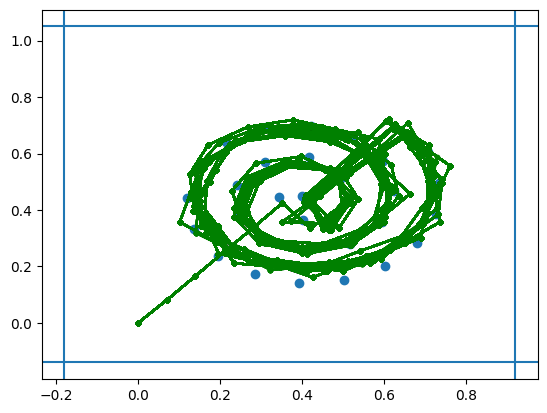

In [46]:
vlp_model = vlp.load_vlp_models()['high_acc']
rnn_mod = load_model(MODELS_DIR / 'navigation_neural_nets/rnn.keras') 

live_ekf = load_ekf()

df = init_df()

plt.figure()
tar_pattern = gen_tar_pattern()
plot_pattern(tar_pattern)


all_targets = np.tile(tar_pattern, (300, 1))
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    tar_x= target[0]
    tar_y = target[1]

    nav_to_point(tar_x, tar_y)

    plot_path(df['real_x'],df['real_y'])


In [45]:
read_vive_gt()

(np.float64(0.0003168325822399085),
 np.float64(-0.003960317829552834),
 np.float64(-0.24485177534609193))

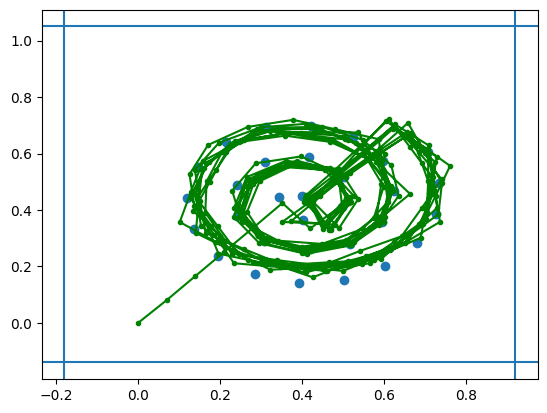

In [47]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['real_x'],df['real_y'])
# plot_path(df['encoder_x'],df['encoder_y'])

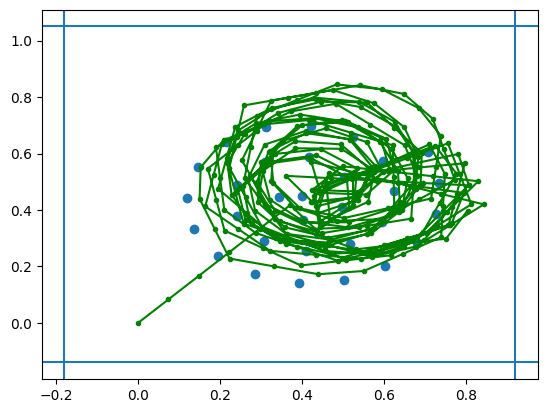

In [48]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['encoder_x'],df['encoder_y'])

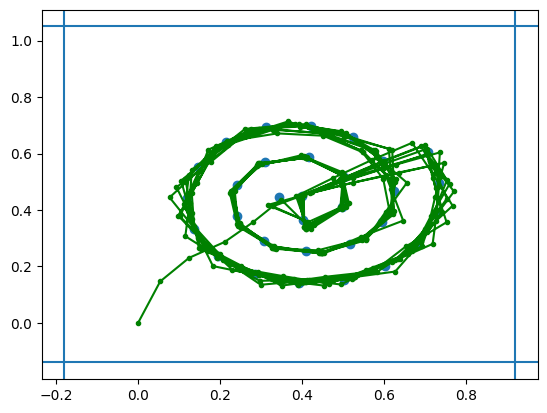

In [49]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['ekf_x'],df['ekf_y'])

In [50]:
df.to_csv('ekf_ccw_spiral_in_out_run.csv')

In [114]:
encoder_run_df =  pd.read_csv('encoder_eight_run.csv')
encoder_errs = np.sqrt((np.square(encoder_run_df['ekf_x'] - encoder_run_df['real_x']) + np.square(encoder_run_df['ekf_y'] - encoder_run_df['real_y']))[1:].to_list())
encoder_ang_errs = c.normalize_angle((encoder_run_df['encoder_heading'] - encoder_run_df['real_heading']).to_list())


ekf_run_df = pd.read_csv('ekf_eight_run.csv')
ekf_errs = np.sqrt((np.square(ekf_run_df['ekf_x'] - ekf_run_df['real_x']) + np.square(ekf_run_df['ekf_y'] - ekf_run_df['real_y']))[1:].to_list())
ekf_ang_errs = c.normalize_angle((ekf_run_df['ekf_heading'] - ekf_run_df['real_heading']).to_list())


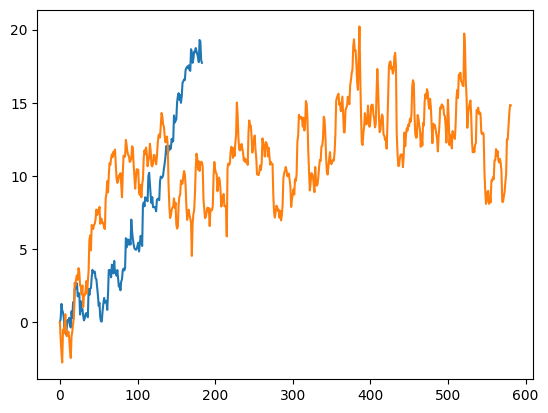

In [115]:
plt.plot(encoder_ang_errs)
plt.plot(ekf_ang_errs)

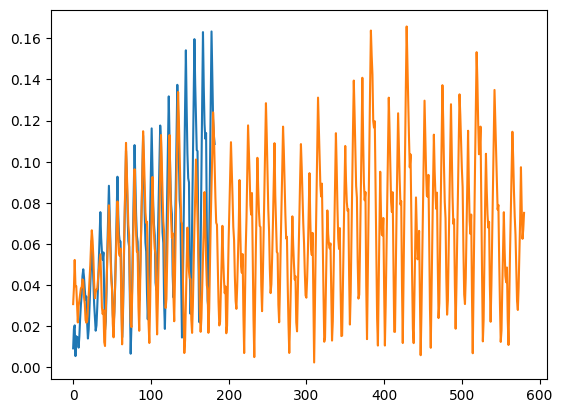

In [116]:
plt.plot(encoder_errs)
plt.plot(ekf_errs)

# CNC control

In [57]:
# com_port = '/dev/tty.usbserial-A505I3Q9'  # Update with your sensor's COM port
com_port = 'COM7'  # Update with your sensor's COM port
cnc_serial = serial.Serial(com_port, 115200)
c.init_cnc(cnc_serial)
   

In [36]:
cnc_serial.close()

In [5]:
c.absolute_movement(0, 0, cnc_serial)

Sending command: G1 X0 Y0 F1000
GRBL Response:  ok


In [55]:
adc = c.read_n_vlp(10)

taking vlp readings:  0 1 2 3 4 5 6 7 8 9 

(array([ 11.,  70., 123.,  59.,   9.,  17.,  57., 113.,  27.,  26.]),
 array([   0. ,  397.6,  795.2, 1192.8, 1590.4, 1988. , 2385.6, 2783.2,
        3180.8, 3578.4, 3976. ]),
 <BarContainer object of 10 artists>)

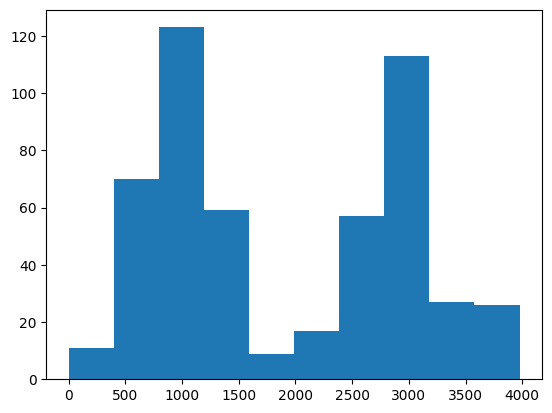

In [39]:
plt.hist(adc[4])

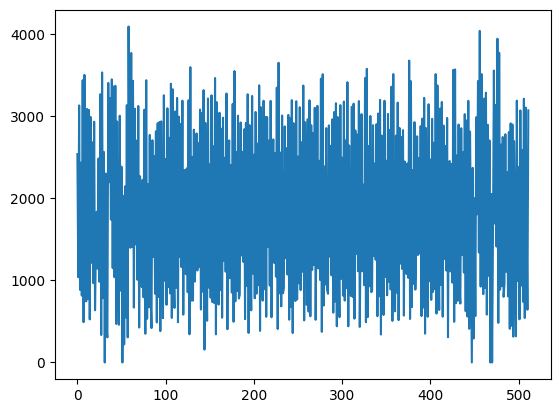

In [40]:
plt.plot(adc[6])

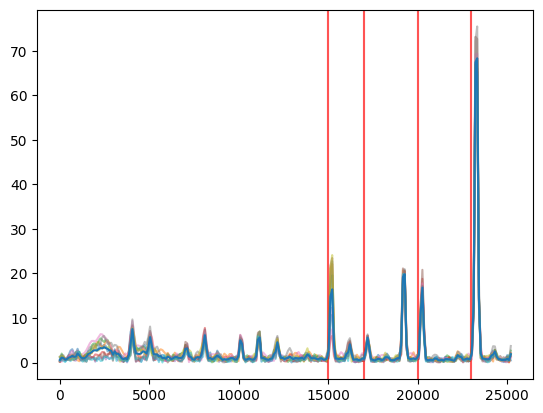

In [9]:
fft_lst = []
for i in range (10):
    t = np.array(adc)[i]
    fft, fre = c.FFT_win(t)
    fft_lst.append(fft)
    plt.plot(fre, fft, alpha = 0.5)

    
    for l in [15000, 17000, 20000, 23000]:
        plt.axvline(l, c = 'r', alpha = 0.1)

plt.plot(fre, np.mean(fft_lst, axis = 0))

In [242]:
# vive = c.vive_setup()
# print(c.read_vive(vive, n_readings= 10) ) #test



In [58]:
log_file = 'cnc_fingerprint_02.csv'
c.cnc_log_clear(log_file)

In [105]:
# Main functionality

scan_points = c.generate_scan_points(step=25)


In [49]:
import numpy as np

def generate_scan_points(step=50, width=900, height=1000):
    """
    Generates a set of coordinate points to scan over a 2D area with a zigzag pattern,
    with each point randomly offset by a uniform distribution in positive directions only,
    while ensuring that no point exceeds the boundaries of the width and height,
    and that both x and y values are greater than 0.
    """
    points = []
    
    for y in range(step, height, step):  # Start from 'step' to avoid y = 0
        if y % (2 * step) == 0:
            # Move left to right
            row_points = [(x, y) for x in range(step, width, step)]  # Start from 'step' to avoid x = 0
        else:
            # Move right to left
            row_points = [(x, y) for x in range(width - step, 0, -step)]  # Start from 'width - step'
        
        # Apply random offset to each point, ensuring the point stays within bounds
        for i, (x, y) in enumerate(row_points):
            # Generate random offsets between 0 and step (positive only)
            offset_x = np.random.uniform(0, min(step, width - x))  # Ensure x stays within width
            offset_y = np.random.uniform(0, min(step, height - y))  # Ensure y stays within height
            # Apply offset and store the new point
            points.append((x + offset_x, y + offset_y))
    
    return np.array(points)


scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

In [59]:
scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

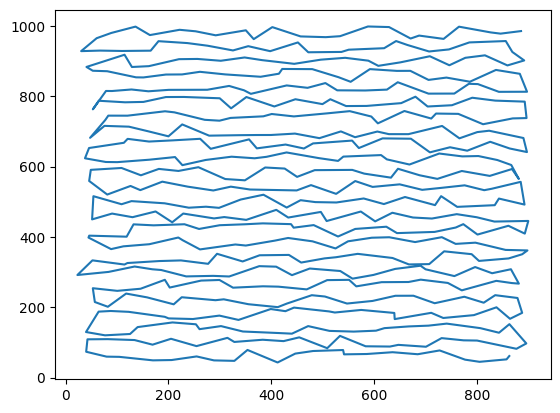

In [51]:
plt.plot(scan_points[:,0], scan_points[:,1])

In [60]:
scan_points[0]

array([883.09054677,  53.45977066])

In [61]:
c.absolute_movement(883, 53, cnc_serial)
time.sleep(6)
print('times up')

Sending command: G1 X883 Y53 F1000
GRBL Response:  ok
times up


In [24]:
len(scan_points)

624

In [62]:
last_position_id = c.get_last_logged_point(log_file)

# Determine starting point
start_index = last_position_id + 1  # Start from the next point
if start_index == 0:
    c.cnc_log_clear(log_file)  # If no valid log file exists, clear and initialize log

# Resume data collection
for i in range(start_index, len(scan_points)):
    x, y = scan_points[i]
    # Move to the point (you should implement `absolute_movement`)
    c.absolute_movement(x, y,cnc_serial)
    print(f'Moving to {x},{y}')
    time.sleep(6)  # Wait to stabilize sensors

    # Collect data (mock example)
    for _ in range(5):
        try:
            vive_data = c.read_vive(vive)
            break
        except:
            pass
    vive_data = " "
    # vlp_data, _ = c.take_mean_fft(10)
    vlp_data = c.read_n_vlp(10)
    
    # Log the data
    c.cnc_log_write(log_file, i, x, y, vive_data, vlp_data)

Sending command: G1 X883.0905467678173 Y53.459770656489965 F1000
GRBL Response:  ok
Moving to 883.0905467678173,53.459770656489965
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X839.8517022436553 Y57.76769011097293 F1000
GRBL Response:  ok
Moving to 839.8517022436553,57.76769011097293
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X788.9226638862432 Y45.46491701438464 F1000
GRBL Response:  ok
Moving to 788.9226638862432,45.46491701438464
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X751.3279138035449 Y63.31900220818741 F1000
GRBL Response:  ok
Moving to 751.3279138035449,63.31900220818741
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X711.6693799226786 Y59.34456897325507 F1000
GRBL Response:  ok
Moving to 711.6693799226786,59.34456897325507
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X697.9468534948784 Y68.51274611698946 F1000
GRBL Response:  ok
Moving to 697.9468534948784,68.51274611698946
taking vlp rea

## vive pose transform

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from scipy.optimize import minimize

class OrientationTransformer:
    def __init__(self):
        self.transform_matrix = None

    def build_transform(self, raw_points, desired_points):
        """
        Builds the transformation matrix to convert raw yaw, pitch, roll to the desired reference frame.

        Parameters:
        raw_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the raw frame.
        desired_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the desired frame.
        """
        if len(raw_points) != len(desired_points):
            raise ValueError("Number of raw points and desired points must match.")

        def cost_function(transform_vector):
            # Transform vector defines a rotation matrix via Euler angles
            transform_rotation = R.from_euler('zyx', transform_vector, degrees=True).as_matrix()
            total_error = 0

            for raw, desired in zip(raw_points, desired_points):
                raw_rotation = R.from_euler('zyx', raw, degrees=True).as_matrix()
                desired_rotation = R.from_euler('zyx', desired, degrees=True).as_matrix()

                # Apply transformation
                transformed_rotation = np.dot(transform_rotation, raw_rotation)

                # Compute error
                error_matrix = np.dot(desired_rotation.T, transformed_rotation)
                angle_error = R.from_matrix(error_matrix).magnitude()
                total_error += angle_error**2

            return total_error

        # Optimize the transform vector (initial guess is [0, 0, 0])
        result = minimize(cost_function, [0, 0, 0], bounds=[(-180, 180), (-180, 180), (-180, 180)])

        if not result.success:
            raise RuntimeError("Optimization failed to find a valid transform.")

        # Save the resulting transformation matrix
        self.transform_matrix = R.from_euler('zyx', result.x, degrees=True).as_matrix()

    def transform(self, raw_orientation):
        """
        Transforms a raw [yaw, pitch, roll] orientation to the desired reference frame.

        Parameters:
        raw_orientation (list of float): An array representing [yaw, pitch, roll] in the raw frame.

        Returns:
        list of float: Transformed [yaw, pitch, roll] in the desired reference frame.
        """
        if self.transform_matrix is None:
            raise ValueError("Transformation matrix has not been built. Call build_transform first.")

        # Convert raw orientation to rotation matrix
        raw_rotation = R.from_euler('zyx', raw_orientation, degrees=True).as_matrix()

        # Apply the transformation
        transformed_rotation = np.dot(self.transform_matrix, raw_rotation)

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()

# Suggested calibration points for yaw with zero pitch and roll (desired frame)
def generate_calibration_points():
    yaw_values = [0, 45, 90, 135, 180, -135, -90, -45]
    raw_points = []
    desired_points = []

    for yaw in yaw_values:
        raw_points.append([yaw + np.random.uniform(-5, 5), np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
        desired_points.append([yaw, 0, 0])

    return raw_points, desired_points




In [3]:
raw_calibration_points, desired_calibration_points = generate_calibration_points()

In [4]:
raw_calibration_points

[[-1.4486288969825, -0.8592204717742087, -0.8234303617341321],
 [49.65097076823027, -1.6437974080380395, -1.7831470605821607],
 [93.22230889505094, -0.34679139351794674, 0.7685642263929244],
 [136.78707410009068, 1.6876620878914528, -0.8312794863740725],
 [179.5274504261781, -1.564160938331658, 1.4847490934952168],
 [-139.61393275592818, -1.3056471509214091, -0.915266895620165],
 [-89.93398026325974, -0.2730123518970533, 1.1827420221134681],
 [-49.91980055904709, -1.384853678111647, -0.6276115190718934]]

In [ ]:
# Example usage:
# Define raw and desired calibration points (yaw, pitch, roll in degrees)


transformer = OrientationTransformer()
transformer.build_transform(raw_calibration_points, desired_calibration_points)

# Transform a new raw orientation
raw_orientation = [60, 1, 1]
transformed_orientation = transformer.transform(raw_orientation)
print("Transformed orientation:", transformed_orientation)

In [ ]:
vive = c.vive_setup()

c.read_vive(vive)[:3]

In [ ]:
c.average_vive_readings(c.read_vive(vive))

np.float64(0.6687380194664001)

In [69]:
pose3 = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]

In [70]:
raw_calibration_points = np.array([pose1, pose2, pose3])

In [ ]:
from scipy.spatial.transform import Rotation as R

class ViveToRobotTransform:
    # ... [existing methods unchanged]

    def transform_orientation(self, yaw_pitch_roll):
        """
        Transform a yaw, pitch, roll orientation from tracker frame to room frame.

        Parameters:
        yaw_pitch_roll (list of float): [yaw, pitch, roll] in the tracker reference frame.

        Returns:
        list of float: [yaw, pitch, roll] in the room reference frame.
        """
        if self.transformation_matrix is None:
            raise ValueError("Transformation not yet derived. Call `derive_transform` first.")

        # Convert yaw, pitch, roll to rotation matrix
        raw_rotation = R.from_euler('zyx', yaw_pitch_roll, degrees=True).as_matrix()

        # Apply the positional transformation to the rotation matrix
        transformed_rotation = self.transformation_matrix[:3, :3] @ raw_rotation

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()


Transformed orientation: [160.22989873661334, -61.5708115771416, -31.08009833933425]


In [72]:
raw_lst = []
tra_lst = []

[ -0.33719857 -29.03383401  90.43535076]
[6.065839706020269, 1.6270964944398643, -14.122116045113465]


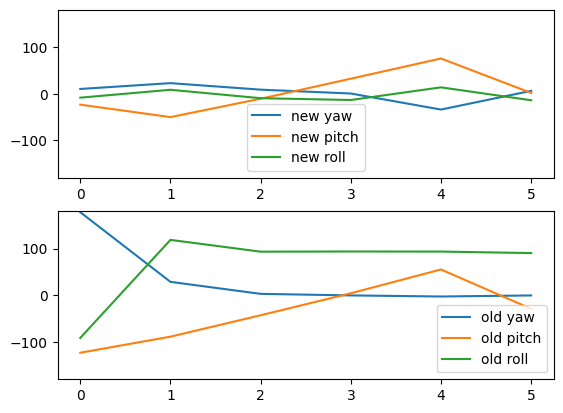

: 

In [ ]:


raw_pose = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]
trans_pose = transformer.transform(raw_pose)
print(raw_pose)
print(trans_pose)
raw_lst.append(raw_pose)
tra_lst.append(trans_pose)

plt.figure()
ax1 = plt.subplot(212)
ax1.plot(np.array(raw_lst)[:,0], label = 'old yaw')
ax1.plot(np.array(raw_lst)[:,1], label = 'old pitch')
ax1.plot(np.array(raw_lst)[:,2], label = 'old roll')

ax2 = plt.subplot(211)
ax2.plot(np.array(tra_lst)[:,0], label = 'new yaw')
ax2.plot(np.array(tra_lst)[:,1], label = 'new pitch')
ax2.plot(np.array(tra_lst)[:,2], label = 'new roll')
ax1.set_ylim(-180,180)
ax2.set_ylim(-180, 180)
ax1.legend()
ax2.legend()
